In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df = df.dropna(subset=['title'])
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

<ipython-input-10-d081194b9a10>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


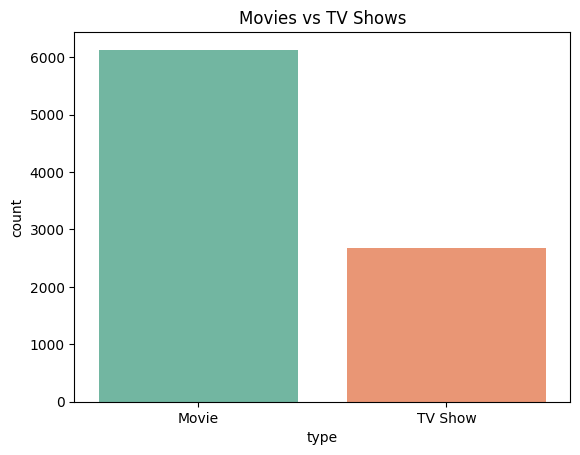

In [ ]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows")
plt.show()

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


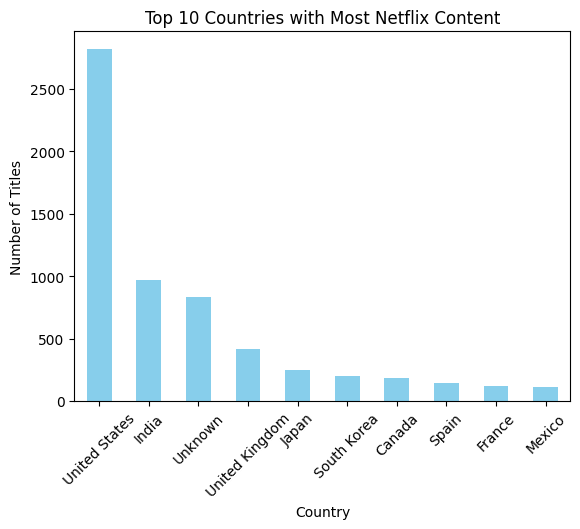

In [12]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

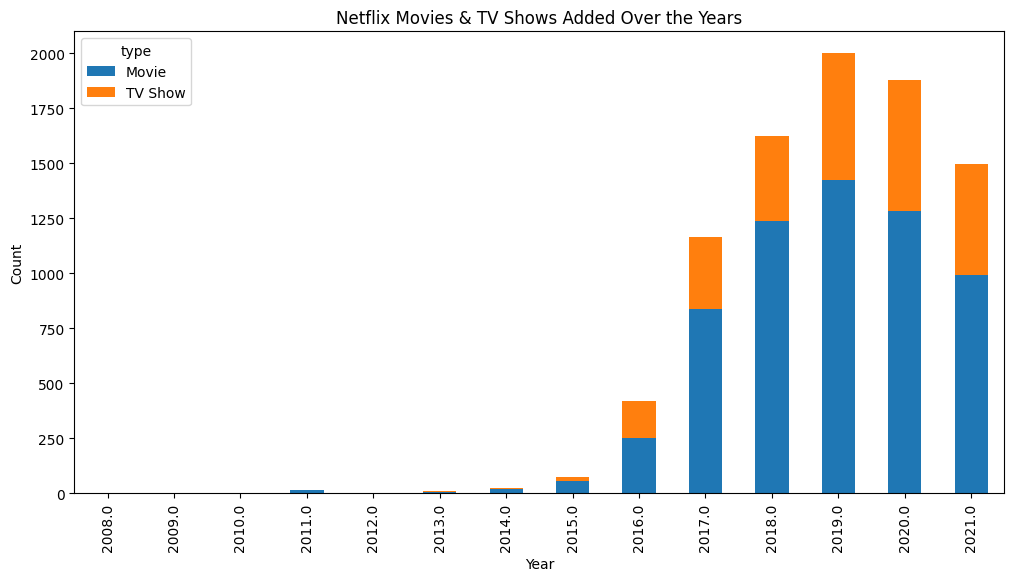

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

df_year_type = df.groupby(['year_added', 'type']).size().unstack()
df_year_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Netflix Movies & TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

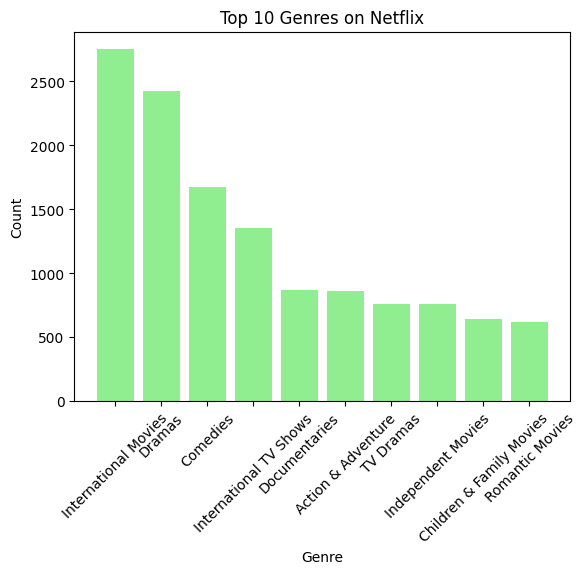

In [15]:
from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in genres])
top_genres = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:10])

plt.bar(top_genres.keys(), top_genres.values(), color='lightgreen')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()